#The Data Den  - Climate Change Analysis and Prediction

##Import libraries

In [1]:
# Basic Imports
import numpy as np
import pandas as pd
import math

# Visualization 
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_context('notebook')
sns.set_style('whitegrid')
matplotlib.rcParams['figure.figsize'] = (15,8)  

# Model

from datetime import datetime
import datetime as dt
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from statistics import mean
from sklearn.metrics import mean_squared_error,mean_absolute_percentage_error



##Reading files

In [2]:
#Don't run this cell all the time
import os, glob
import pandas as pd
path = r"C:\Users\DELL\Desktop\PES 5 SEM\DATA ANALYTICS\PROJECT CLIMATE CHANGE"
all_files = glob.glob(os.path.join(path, "Global*.csv"))
df_from_each_file = (pd.read_csv(f, sep=',') for f in all_files)
#df_merged = pd.concat(df_from_each_file, ignore_index = True)
#df_merged.to_csv("mergeddata.csv")

##Data Exploration

In [3]:
df = pd.read_csv(r"C:\Users\DELL\Desktop\PES 5 SEM\DATA ANALYTICS\PROJECT CLIMATE CHANGE\mergeddata.csv")

C:\Users\DELL\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (5,6,7,8) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [4]:
df.head()

,Unnamed: 0,dt,AverageTemperature,AverageTemperatureUncertainty,Country,City,Latitude,Longitude,State,LandAverageTemperature,LandAverageTemperatureUncertainty,LandMaxTemperature,LandMaxTemperatureUncertainty,LandMinTemperature,LandMinTemperatureUncertainty,LandAndOceanAverageTemperature,LandAndOceanAverageTemperatureUncertainty
0,0,1743-11-01,4.384,2.294,Åland,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,1743-12-01,NaN,NaN,Åland,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,1744-01-01,NaN,NaN,Åland,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,1744-02-01,NaN,NaN,Åland,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,1744-03-01,NaN,NaN,Åland,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
len(df)

1465506

In [6]:
cols=df.columns
cols

Index(['Unnamed: 0', 'dt', 'AverageTemperature',
       'AverageTemperatureUncertainty', 'Country', 'City', 'Latitude',
       'Longitude', 'State', 'LandAverageTemperature',
       'LandAverageTemperatureUncertainty', 'LandMaxTemperature',
       'LandMaxTemperatureUncertainty', 'LandMinTemperature',
       'LandMinTemperatureUncertainty', 'LandAndOceanAverageTemperature',
       'LandAndOceanAverageTemperatureUncertainty'],
      dtype='object')

In [7]:
df["dt"]

0          1743-11-01
1          1743-12-01
2          1744-01-01
3          1744-02-01
4          1744-03-01
              ...    
1465501    2015-08-01
1465502    2015-09-01
1465503    2015-10-01
1465504    2015-11-01
1465505    2015-12-01
Name: dt, Length: 1465506, dtype: object

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1465506 entries, 0 to 1465505
Data columns (total 17 columns):
 #   Column                                     Non-Null Count    Dtype  
---  ------                                     --------------    -----  
 0   Unnamed: 0                                 1465506 non-null  int64  
 1   dt                                         1465506 non-null  object 
 2   AverageTemperature                         1393013 non-null  float64
 3   AverageTemperatureUncertainty              1393752 non-null  float64
 4   Country                                    1462314 non-null  object 
 5   City                                       239177 non-null   object 
 6   Latitude                                   239177 non-null   object 
 7   Longitude                                  239177 non-null   object 
 8   State                                      645675 non-null   object 
 9   LandAverageTemperature                     3180 non-null     float64

In [9]:
df.describe()

,Unnamed: 0,AverageTemperature,AverageTemperatureUncertainty,LandAverageTemperature,LandAverageTemperatureUncertainty,LandMaxTemperature,LandMaxTemperatureUncertainty,LandMinTemperature,LandMinTemperatureUncertainty,LandAndOceanAverageTemperature,LandAndOceanAverageTemperatureUncertainty
count,1.465506e+06,1.393013e+06,1.393752e+06,3180.000000,3180.000000,1992.000000,1992.000000,1992.000000,1992.000000,1992.000000,1992.000000
mean,7.327525e+05,1.369621e+01,1.130404e+00,8.374731,0.938468,14.350601,0.479782,2.743595,0.431849,15.212566,0.128532
std,4.230553e+05,1.287068e+01,1.251388e+00,4.381310,1.096440,4.309579,0.583203,4.155835,0.445838,1.274093,0.073587
min,0.000000e+00,-4.538900e+01,3.600000e-02,-2.080000,0.034000,5.900000,0.044000,-5.407000,0.045000,12.475000,0.042000
25%,3.663762e+05,5.438000e+00,3.230000e-01,4.312000,0.186750,10.212000,0.142000,-1.334500,0.155000,14.047000,0.063000
50%,7.327525e+05,1.657900e+01,6.040000e-01,8.610500,0.392000,14.760000,0.252000,2.949500,0.279000,15.251000,0.122000
75%,1.099129e+06,2.460800e+01,1.474000e+00,12.548250,1.419250,18.451500,0.539000,6.778750,0.458250,16.396250,0.151000
max,1.465505e+06,3.884200e+01,1.500300e+01,19.021000,7.880000,21.320000,4.373000,9.715000,3.498000,17.611000,0.457000


In [10]:
df.shape  #rows and cols

(1465506, 17)

In [11]:
df.isnull().sum()

Unnamed: 0                                         0
dt                                                 0
AverageTemperature                             72493
AverageTemperatureUncertainty                  71754
Country                                         3192
City                                         1226329
Latitude                                     1226329
Longitude                                    1226329
State                                         819831
LandAverageTemperature                       1462326
LandAverageTemperatureUncertainty            1462326
LandMaxTemperature                           1463514
LandMaxTemperatureUncertainty                1463514
LandMinTemperature                           1463514
LandMinTemperatureUncertainty                1463514
LandAndOceanAverageTemperature               1463514
LandAndOceanAverageTemperatureUncertainty    1463514
dtype: int64

<AxesSubplot:>

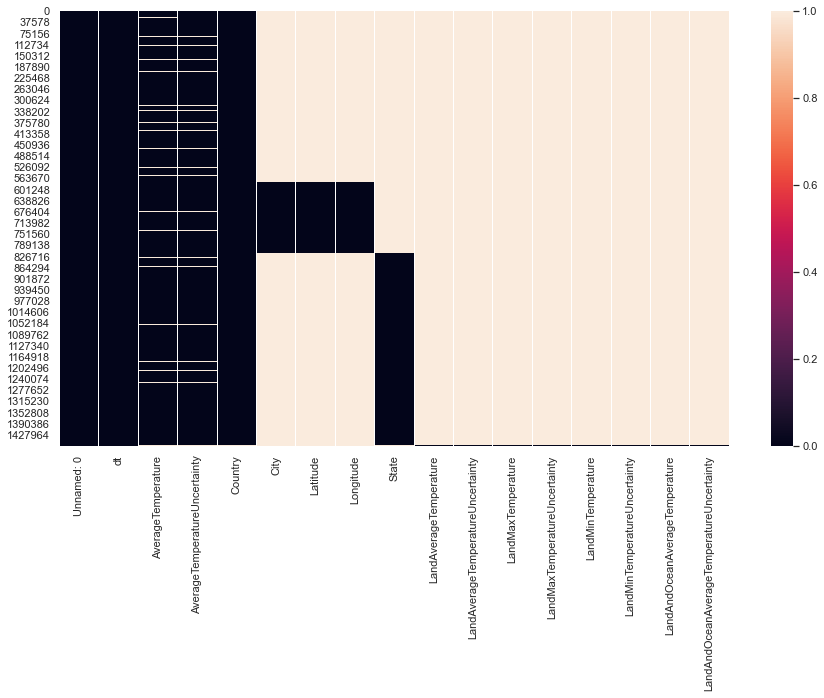

In [12]:
sns.heatmap(df.isnull())

In [13]:
df.isnull().sum().sum() #Total missing values

16351993

In [14]:
df['AverageTemperature'].value_counts()

 26.864    118
 25.567    118
 26.320    114
 26.996    114
 25.759    113
          ... 
-0.726       1
-1.116       1
-7.321       1
 1.654       1
-31.684      1
Name: AverageTemperature, Length: 102761, dtype: int64

In [15]:
df['AverageTemperatureUncertainty'].value_counts()

0.248     2277
0.265     2251
0.256     2249
0.254     2227
0.260     2220
          ... 
10.073       1
9.745        1
9.366        1
9.902        1
9.176        1
Name: AverageTemperatureUncertainty, Length: 9665, dtype: int64

In [16]:
df['City'].value_counts()  #so max major cities-Toronto ,min is Lima

Kiev          3239
New York      3239
Moscow        3239
Montreal      3239
Berlin        3239
              ... 
Luanda        1893
Cape Town     1881
Durban        1881
Umm Durman    1857
Lima          1591
Name: City, Length: 100, dtype: int64

In [17]:
df['State'].value_counts()   #so max States-Arkhangel,min-Hawaii

Voronezh              3239
Kostroma              3239
Adygey                3239
Michigan              3239
Ohio                  3239
                      ... 
Western Australia     1935
Northern Territory    1901
Queensland            1901
Acre                  1901
Hawaii                1569
Name: State, Length: 241, dtype: int64

In [18]:
df['Country'].value_counts()   #so max countries-Russia,min-Antarctica

Russia                                 263871
United States                          161141
India                                  125859
China                                  106268
Brazil                                  49439
                                        ...  
Guam                                     1329
Northern Mariana Islands                 1329
French Southern And Antarctic Lands       788
Heard Island And Mcdonald Islands         788
Antarctica                                764
Name: Country, Length: 243, dtype: int64

In [19]:
df=df.drop(['Unnamed: 0'],axis=1)
df

,dt,AverageTemperature,AverageTemperatureUncertainty,Country,City,Latitude,Longitude,State,LandAverageTemperature,LandAverageTemperatureUncertainty,LandMaxTemperature,LandMaxTemperatureUncertainty,LandMinTemperature,LandMinTemperatureUncertainty,LandAndOceanAverageTemperature,LandAndOceanAverageTemperatureUncertainty
0,1743-11-01,4.384,2.294,Åland,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1743-12-01,NaN,NaN,Åland,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1744-01-01,NaN,NaN,Åland,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1744-02-01,NaN,NaN,Åland,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1744-03-01,NaN,NaN,Åland,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465501,2015-08-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14.755,0.072,20.699,0.110,9.005,0.170,17.589,0.057
1465502,2015-09-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.999,0.079,18.845,0.088,7.199,0.229,17.049,0.058
1465503,2015-10-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.801,0.102,16.450,0.059,5.232,0.115,16.290,0.062
1465504,2015-11-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.433,0.119,12.892,0.093,2.157,0.106,15.252,0.063


##Handling missing values

In [20]:
df = df.fillna(value = 0)
df

,dt,AverageTemperature,AverageTemperatureUncertainty,Country,City,Latitude,Longitude,State,LandAverageTemperature,LandAverageTemperatureUncertainty,LandMaxTemperature,LandMaxTemperatureUncertainty,LandMinTemperature,LandMinTemperatureUncertainty,LandAndOceanAverageTemperature,LandAndOceanAverageTemperatureUncertainty
0,1743-11-01,4.384,2.294,Åland,0,0,0,0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
1,1743-12-01,0.000,0.000,Åland,0,0,0,0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
2,1744-01-01,0.000,0.000,Åland,0,0,0,0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
3,1744-02-01,0.000,0.000,Åland,0,0,0,0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
4,1744-03-01,0.000,0.000,Åland,0,0,0,0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465501,2015-08-01,0.000,0.000,0,0,0,0,0,14.755,0.072,20.699,0.110,9.005,0.170,17.589,0.057
1465502,2015-09-01,0.000,0.000,0,0,0,0,0,12.999,0.079,18.845,0.088,7.199,0.229,17.049,0.058
1465503,2015-10-01,0.000,0.000,0,0,0,0,0,10.801,0.102,16.450,0.059,5.232,0.115,16.290,0.062
1465504,2015-11-01,0.000,0.000,0,0,0,0,0,7.433,0.119,12.892,0.093,2.157,0.106,15.252,0.063


In [21]:
#imputing missing values with mean and mode for numeric and category respectively
cateogry_columns=df.select_dtypes(include=['object']).columns.tolist()
integer_columns=df.select_dtypes(include=['int64','float64']).columns.tolist()

for column in df:
    if df[column].isnull().any():
        if(column in cateogry_columns):
            df[column]=df[column].fillna(df[column].mode()[0])
        else:
            df[column]=df[column].fillna(df[column].mean)

In [22]:
df.isnull().sum()

dt                                           0
AverageTemperature                           0
AverageTemperatureUncertainty                0
Country                                      0
City                                         0
Latitude                                     0
Longitude                                    0
State                                        0
LandAverageTemperature                       0
LandAverageTemperatureUncertainty            0
LandMaxTemperature                           0
LandMaxTemperatureUncertainty                0
LandMinTemperature                           0
LandMinTemperatureUncertainty                0
LandAndOceanAverageTemperature               0
LandAndOceanAverageTemperatureUncertainty    0
dtype: int64

In [23]:
df.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,Country,City,Latitude,Longitude,State,LandAverageTemperature,LandAverageTemperatureUncertainty,LandMaxTemperature,LandMaxTemperatureUncertainty,LandMinTemperature,LandMinTemperatureUncertainty,LandAndOceanAverageTemperature,LandAndOceanAverageTemperatureUncertainty
0,1743-11-01,4.384,2.294,Åland,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1743-12-01,0.000,0.000,Åland,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1744-01-01,0.000,0.000,Åland,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1744-02-01,0.000,0.000,Åland,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1744-03-01,0.000,0.000,Åland,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [24]:
df.tail()

,dt,AverageTemperature,AverageTemperatureUncertainty,Country,City,Latitude,Longitude,State,LandAverageTemperature,LandAverageTemperatureUncertainty,LandMaxTemperature,LandMaxTemperatureUncertainty,LandMinTemperature,LandMinTemperatureUncertainty,LandAndOceanAverageTemperature,LandAndOceanAverageTemperatureUncertainty
1465501,2015-08-01,0.0,0.0,0,0,0,0,0,14.755,0.072,20.699,0.110,9.005,0.170,17.589,0.057
1465502,2015-09-01,0.0,0.0,0,0,0,0,0,12.999,0.079,18.845,0.088,7.199,0.229,17.049,0.058
1465503,2015-10-01,0.0,0.0,0,0,0,0,0,10.801,0.102,16.450,0.059,5.232,0.115,16.290,0.062
1465504,2015-11-01,0.0,0.0,0,0,0,0,0,7.433,0.119,12.892,0.093,2.157,0.106,15.252,0.063
1465505,2015-12-01,0.0,0.0,0,0,0,0,0,5.518,0.100,10.725,0.154,0.287,0.099,14.774,0.062


<AxesSubplot:>

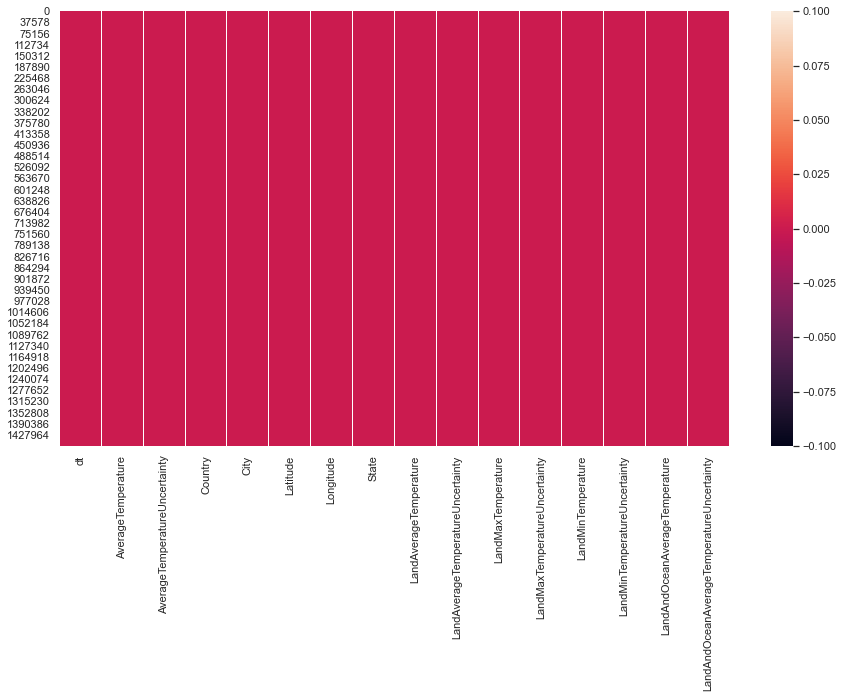

In [25]:
sns.heatmap(df.isnull())

In [26]:
## downcasting to reduce the size of the dataset
for column in df:
 if (df[column].dtype == 'float64'):
  df[column]=pd.to_numeric(df[column], downcast='float')
 if df[column].dtype == 'int64':
  df[column]=pd.to_numeric(df[column], downcast='integer')


In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1465506 entries, 0 to 1465505
Data columns (total 16 columns):
 #   Column                                     Non-Null Count    Dtype  
---  ------                                     --------------    -----  
 0   dt                                         1465506 non-null  object 
 1   AverageTemperature                         1465506 non-null  float32
 2   AverageTemperatureUncertainty              1465506 non-null  float32
 3   Country                                    1465506 non-null  object 
 4   City                                       1465506 non-null  object 
 5   Latitude                                   1465506 non-null  object 
 6   Longitude                                  1465506 non-null  object 
 7   State                                      1465506 non-null  object 
 8   LandAverageTemperature                     1465506 non-null  float32
 9   LandAverageTemperatureUncertainty          1465506 non-null  float32

##Finding out the Outliers

In [28]:
#To find numerical columns in our dataset
df_num=df._get_numeric_data()
df_num

,AverageTemperature,AverageTemperatureUncertainty,LandAverageTemperature,LandAverageTemperatureUncertainty,LandMaxTemperature,LandMaxTemperatureUncertainty,LandMinTemperature,LandMinTemperatureUncertainty,LandAndOceanAverageTemperature,LandAndOceanAverageTemperatureUncertainty
0,4.384,2.294,0.000,0.000,0.000000,0.000,0.000,0.000,0.000000,0.000
1,0.000,0.000,0.000,0.000,0.000000,0.000,0.000,0.000,0.000000,0.000
2,0.000,0.000,0.000,0.000,0.000000,0.000,0.000,0.000,0.000000,0.000
3,0.000,0.000,0.000,0.000,0.000000,0.000,0.000,0.000,0.000000,0.000
4,0.000,0.000,0.000,0.000,0.000000,0.000,0.000,0.000,0.000000,0.000
...,...,...,...,...,...,...,...,...,...,...
1465501,0.000,0.000,14.755,0.072,20.698999,0.110,9.005,0.170,17.589001,0.057
1465502,0.000,0.000,12.999,0.079,18.844999,0.088,7.199,0.229,17.049000,0.058
1465503,0.000,0.000,10.801,0.102,16.450001,0.059,5.232,0.115,16.290001,0.062
1465504,0.000,0.000,7.433,0.119,12.892000,0.093,2.157,0.106,15.252000,0.063


In [29]:
cols=df.columns
#To find categorical columns in our dataset
df_categorical=set(cols)-set(df_num)
df_cat=(df_categorical)

In [30]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

In [31]:
#to find the count of outliers 
outliers=((df < (Q1 - 1.5 * IQR))) | ((df > (Q3 + 1.5 * IQR)))
outliers.sum()

<ipython-input-31-717cd9be7c1f>:2: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  outliers=((df < (Q1 - 1.5 * IQR))) | ((df > (Q3 + 1.5 * IQR)))
<ipython-input-31-717cd9be7c1f>:2: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  outliers=((df < (Q1 - 1.5 * IQR))) | ((df > (Q3 + 1.5 * IQR)))


AverageTemperature                             6514
AverageTemperatureUncertainty                121206
City                                              0
Country                                           0
LandAndOceanAverageTemperature                 1992
LandAndOceanAverageTemperatureUncertainty      1992
LandAverageTemperature                         3180
LandAverageTemperatureUncertainty              3180
LandMaxTemperature                             1992
LandMaxTemperatureUncertainty                  1992
LandMinTemperature                             1992
LandMinTemperatureUncertainty                  1992
Latitude                                          0
Longitude                                         0
State                                             0
dt                                                0
dtype: int64

In [32]:
df.corr()

,AverageTemperature,AverageTemperatureUncertainty,LandAverageTemperature,LandAverageTemperatureUncertainty,LandMaxTemperature,LandMaxTemperatureUncertainty,LandMinTemperature,LandMinTemperatureUncertainty,LandAndOceanAverageTemperature,LandAndOceanAverageTemperatureUncertainty
AverageTemperature,1.000000,-0.213129,-0.041708,-0.030598,-0.035672,-0.023657,-0.020515,-0.025909,-0.037117,-0.032321
AverageTemperatureUncertainty,-0.213129,1.000000,-0.035687,-0.026180,-0.030522,-0.020242,-0.017553,-0.022168,-0.031759,-0.027655
LandAverageTemperature,-0.041708,-0.035687,1.000000,0.503758,0.789393,0.425714,0.691964,0.456028,0.744342,0.599168
LandAverageTemperatureUncertainty,-0.030598,-0.026180,0.503758,1.000000,0.139714,0.178066,0.066121,0.183355,0.148129,0.190242
LandMaxTemperature,-0.035672,-0.030522,0.789393,0.139714,1.000000,0.584875,0.766060,0.633100,0.978004,0.813807
LandMaxTemperatureUncertainty,-0.023657,-0.020242,0.425714,0.178066,0.584875,1.000000,0.270371,0.923858,0.622392,0.881452
LandMinTemperature,-0.020515,-0.017553,0.691964,0.066121,0.766060,0.270371,1.000000,0.271880,0.617601,0.413668
LandMinTemperatureUncertainty,-0.025909,-0.022168,0.456028,0.183355,0.633100,0.923858,0.271880,1.000000,0.679864,0.917842
LandAndOceanAverageTemperature,-0.037117,-0.031759,0.744342,0.148129,0.978004,0.622392,0.617601,0.679864,1.000000,0.856287
LandAndOceanAverageTemperatureUncertainty,-0.032321,-0.027655,0.599168,0.190242,0.813807,0.881452,0.413668,0.917842,0.856287,1.000000


<AxesSubplot:>

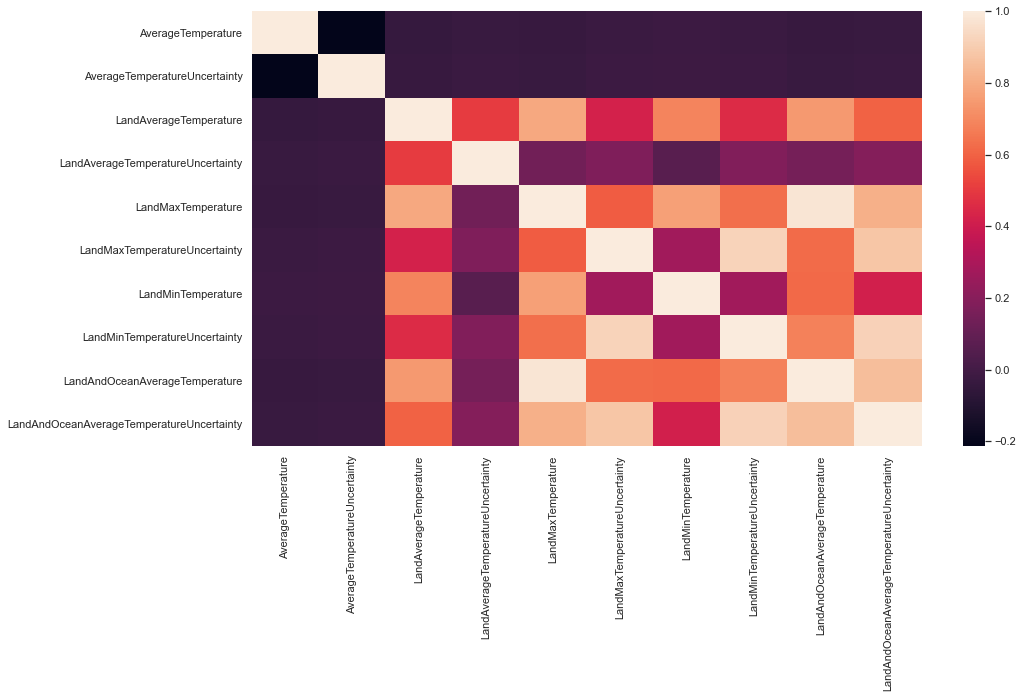

In [33]:
sns.heatmap(df.corr())

##Data Visualization

In [34]:
#Average temperature for each country


countries = df['Country'].unique()
mean_temp = []
for country in countries:
    mean_temp.append(df[df['Country'] == country]['AverageTemperature'].mean())


In [35]:

num_countries = df['Country'].nunique()
num_countries

244

<AxesSubplot:ylabel='Count'>

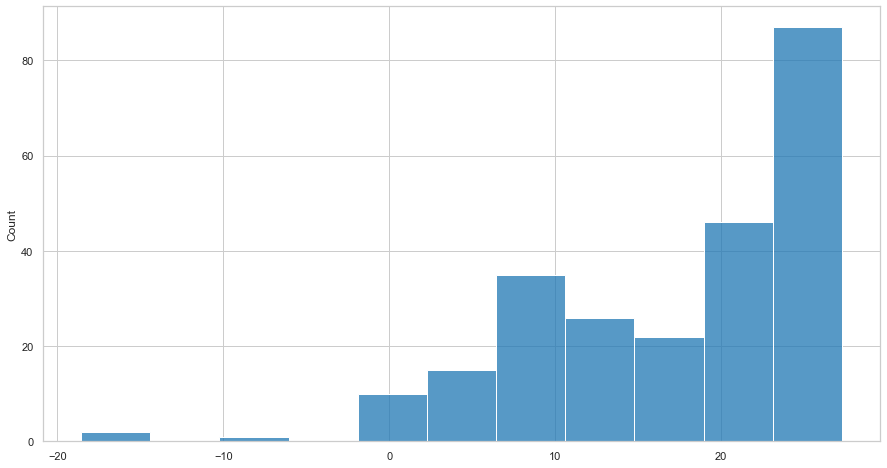

In [36]:
sns.histplot(mean_temp)

In [37]:
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
#mapping of average temperatures in countries
fig = go.Figure(data=go.Choropleth(
    locations=countries, # Spatial coordinates
    z = mean_temp, # Data to be color-coded
    locationmode = 'country names', # set of locations match entries in `locations`
    text = countries,
    colorscale = 'RdBu_r',
    colorbar_title = "Average Temp",
))

fig.update_layout(
    title_text = 'Average land temperature in countries',
    
)

fig.show()

In [38]:
len(countries)

244

In [39]:
#Average temperature for each city


cities = df['City'].unique()
mean_temp = []
for city in cities:
    mean_temp.append(df[df['City'] == city]['AverageTemperature'].mean())

In [40]:
num_cities= df['City'].nunique()
num_cities

101

In [41]:
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
#mapping of average temperatures in cities
fig = go.Figure(data=go.Choropleth(
    locations=cities, # Spatial coordinates
    z = mean_temp, # Data to be color-coded
    locationmode = 'country names', # set of locations match entries in `locations`
    text = cities,
    colorscale = 'RdBu_r',
    colorbar_title = "Average Temp",
))

fig.update_layout(
    title_text = 'Average land temperature in cities',
    
)

fig.show()

In [42]:
#Average temperature for each state


states = df['State'].unique()
mean_temp = []
for state in states:
    mean_temp.append(df[df['State'] == state]['AverageTemperature'].mean())

In [43]:
num_states=df['State'].nunique()
num_states

242

In [44]:
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
#mapping of average temperatures in states
fig = go.Figure(data=go.Choropleth(
    locations=states, # Spatial coordinates
    z = mean_temp, # Data to be color-coded
    locationmode ='country names', # set of locations match entries in `locations`
    text = states,
    colorscale = 'RdBu_r',
    colorbar_title = "Average Temp",
))

fig.update_layout(
    title_text = 'Average land temperature in states',
    
)

fig.show()

##Data Standardization


In [45]:
from sklearn.preprocessing import Normalizer

normalizer = Normalizer()
normalized_values = normalizer.fit_transform(df_num)


In [46]:
normalized_values

array([[0.8860292 , 0.46362934, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.41418937, ..., 0.00440994, 0.62467784,
        0.00237753],
       [0.        , 0.        , 0.3470307 , ..., 0.00494891, 0.7120829 ,
        0.00294133],
       [0.        , 0.        , 0.28927156, ..., 0.0051899 , 0.77450126,
        0.00325024]], dtype=float32)

<AxesSubplot:ylabel='Count'>

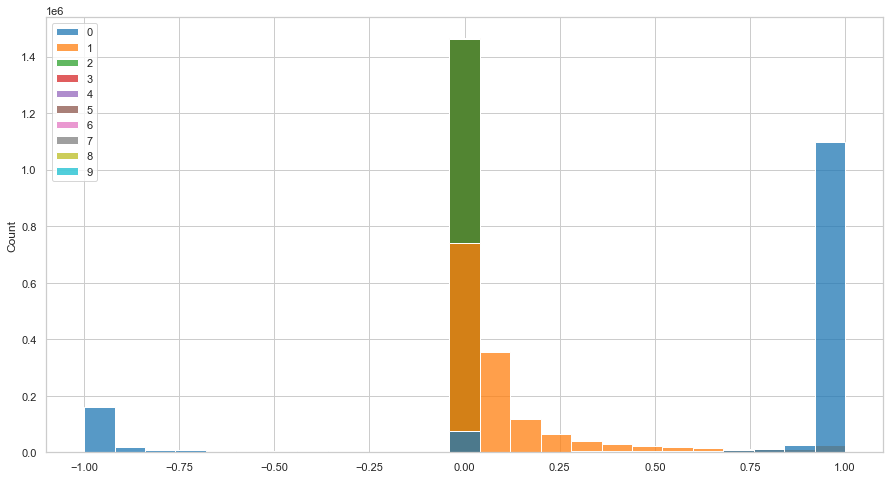

In [47]:
sns.histplot(normalized_values)

In [48]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(df_num)

StandardScaler()

<AxesSubplot:ylabel='Count'>

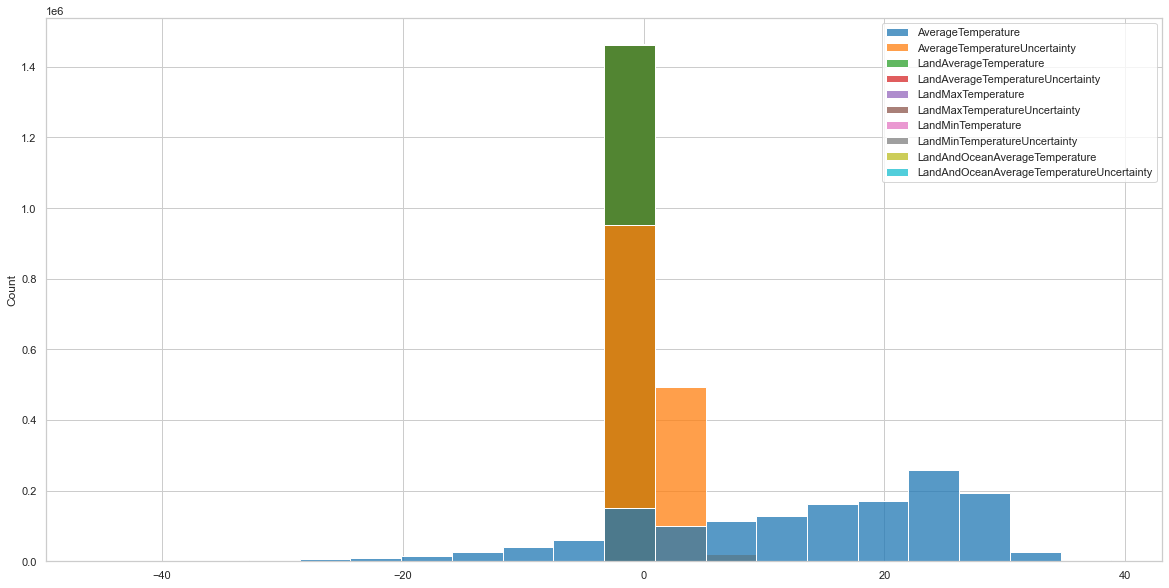

In [49]:
x=df_num
fig=plt.figure(figsize=(20,10))
sns.histplot(x,bins=20)

In [50]:
list(df_num)

['AverageTemperature',
 'AverageTemperatureUncertainty',
 'LandAverageTemperature',
 'LandAverageTemperatureUncertainty',
 'LandMaxTemperature',
 'LandMaxTemperatureUncertainty',
 'LandMinTemperature',
 'LandMinTemperatureUncertainty',
 'LandAndOceanAverageTemperature',
 'LandAndOceanAverageTemperatureUncertainty']

In [51]:

from sklearn.preprocessing import StandardScaler
features = list(df_num)
x = StandardScaler().fit_transform(x)

In [52]:
x.min()

-29.48219

In [53]:
x.max()

157.10509

In [54]:
np.mean(x) #approx to 0 - hence mean=0,standardized!

-7.1967463e-09

In [55]:
np.var(x)  #approx to 1   -hence var=1,standardized!

0.9999821

###PCA

In [56]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principaldf = pd.DataFrame(data = principalComponents , columns = ['principal component 1', 'principal component 2'])

In [57]:
principaldf

,principal component 1,principal component 2
0,-0.088434,-0.000232
1,-0.050417,-0.035961
2,-0.050333,-0.028860
3,-0.050429,-0.037115
4,-0.050411,-0.035502
...,...,...
1465501,63.105816,-40.518524
1465502,57.801987,-32.419178
1465503,48.705212,-26.598122
1465504,38.085323,-13.285809


In [58]:
#since these are strings,we covert it into DateTime Object using pd_todatetime
df['dt'] = pd.to_datetime(df['dt'])
type(df['dt'].iloc[0])

pandas._libs.tslibs.timestamps.Timestamp

In [59]:
df['Date'] = df['dt'] .apply(lambda t: t.date())
df['Month'] = df['dt'] .apply(lambda t: t.month)
df['Year'] = df['dt'] .apply(lambda x: x.year)
df['Day'] = df['dt'] .apply(lambda t: t.dayofweek)

In [60]:
df['AverageTemperature'].value_counts()

 0.000000     72517
 26.864000      118
 25.566999      118
 25.973000      116
 26.014000      114
              ...  
-28.917999        1
-21.848000        1
-28.097000        1
-29.322001        1
-21.195999        1
Name: AverageTemperature, Length: 66944, dtype: int64

In [61]:
df_with_timestamps = pd.DataFrame(df)
df_with_timestamps

,dt,AverageTemperature,AverageTemperatureUncertainty,Country,City,Latitude,Longitude,State,LandAverageTemperature,LandAverageTemperatureUncertainty,LandMaxTemperature,LandMaxTemperatureUncertainty,LandMinTemperature,LandMinTemperatureUncertainty,LandAndOceanAverageTemperature,LandAndOceanAverageTemperatureUncertainty,Date,Month,Year,Day
0,1743-11-01,4.384,2.294,Åland,0,0,0,0,0.000,0.000,0.000000,0.000,0.000,0.000,0.000000,0.000,1743-11-01,11,1743,4
1,1743-12-01,0.000,0.000,Åland,0,0,0,0,0.000,0.000,0.000000,0.000,0.000,0.000,0.000000,0.000,1743-12-01,12,1743,6
2,1744-01-01,0.000,0.000,Åland,0,0,0,0,0.000,0.000,0.000000,0.000,0.000,0.000,0.000000,0.000,1744-01-01,1,1744,2
3,1744-02-01,0.000,0.000,Åland,0,0,0,0,0.000,0.000,0.000000,0.000,0.000,0.000,0.000000,0.000,1744-02-01,2,1744,5
4,1744-03-01,0.000,0.000,Åland,0,0,0,0,0.000,0.000,0.000000,0.000,0.000,0.000,0.000000,0.000,1744-03-01,3,1744,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465501,2015-08-01,0.000,0.000,0,0,0,0,0,14.755,0.072,20.698999,0.110,9.005,0.170,17.589001,0.057,2015-08-01,8,2015,5
1465502,2015-09-01,0.000,0.000,0,0,0,0,0,12.999,0.079,18.844999,0.088,7.199,0.229,17.049000,0.058,2015-09-01,9,2015,1
1465503,2015-10-01,0.000,0.000,0,0,0,0,0,10.801,0.102,16.450001,0.059,5.232,0.115,16.290001,0.062,2015-10-01,10,2015,3
1465504,2015-11-01,0.000,0.000,0,0,0,0,0,7.433,0.119,12.892000,0.093,2.157,0.106,15.252000,0.063,2015-11-01,11,2015,6


<AxesSubplot:xlabel='Month', ylabel='LandAndOceanAverageTemperature'>

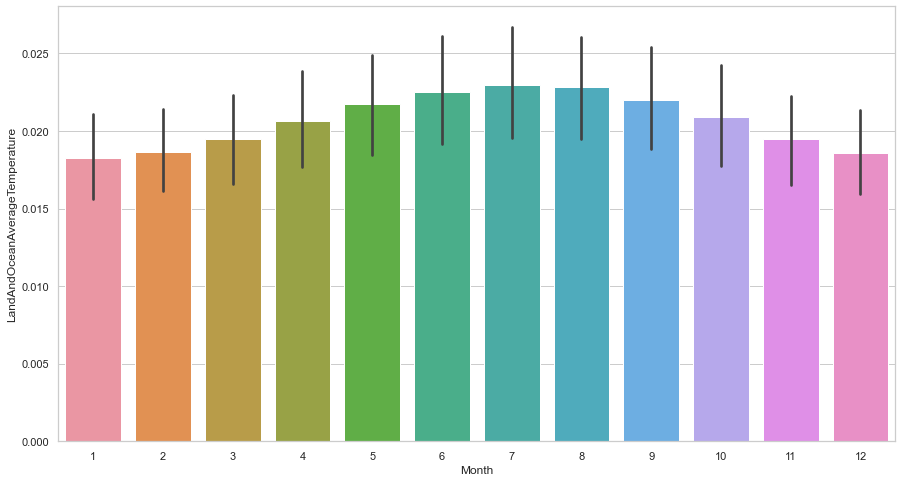

In [62]:
 sns.barplot(x="Month", y="LandAndOceanAverageTemperature", data=df)

<AxesSubplot:xlabel='Year'>

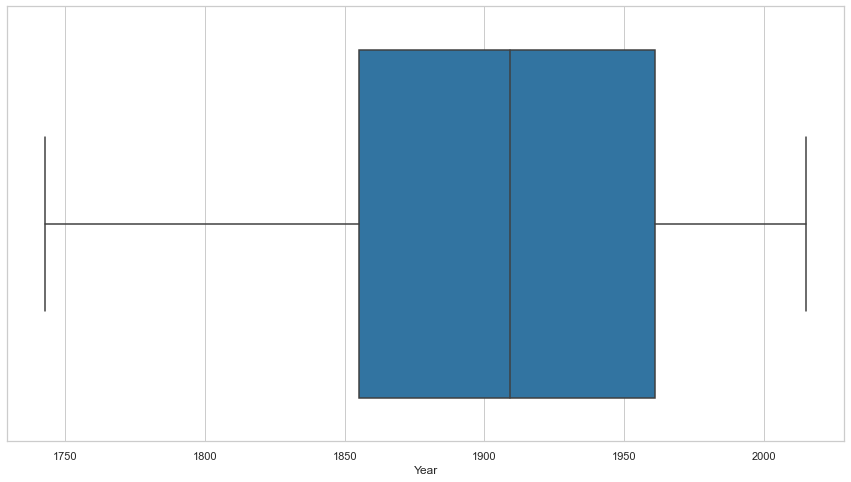

In [63]:
 sns.boxplot(x="Year", data=df)

<AxesSubplot:xlabel='Month'>

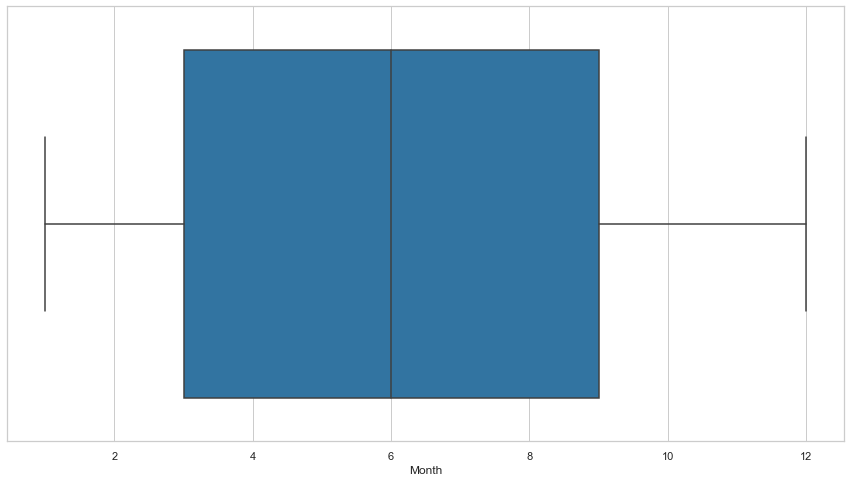

In [64]:
 sns.boxplot(x="Month", data=df)

<AxesSubplot:xlabel='Month', ylabel='LandAverageTemperature'>

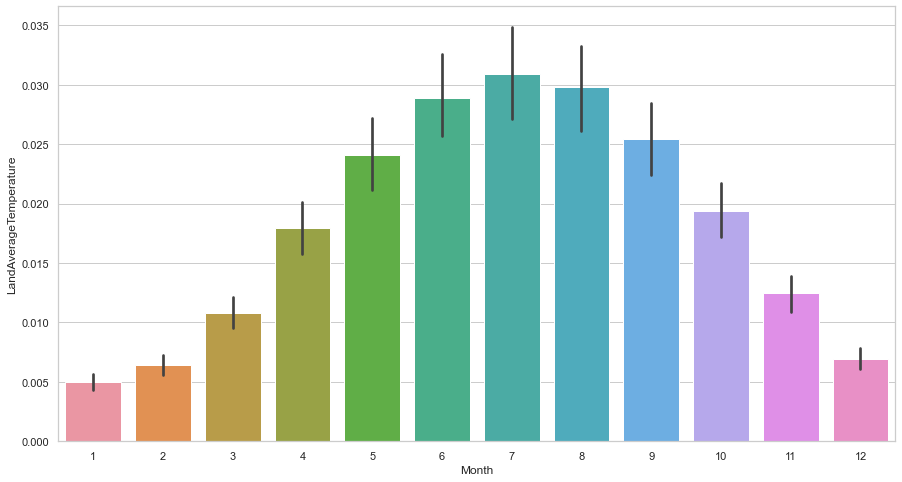

In [65]:
 sns.barplot(x="Month", y="LandAverageTemperature", data=df)

<AxesSubplot:xlabel='Month', ylabel='LandAverageTemperatureUncertainty'>

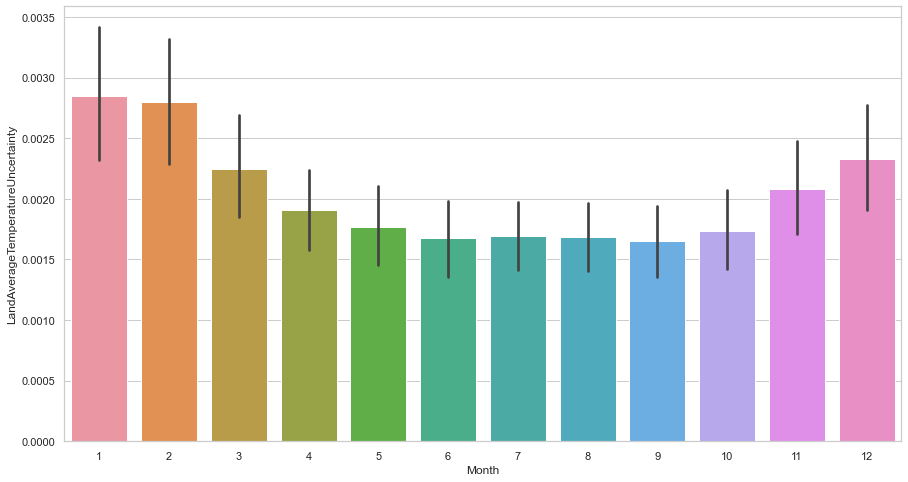

In [66]:
 sns.barplot(x="Month", y="LandAverageTemperatureUncertainty", data=df)

<AxesSubplot:xlabel='Month', ylabel='LandMaxTemperature'>

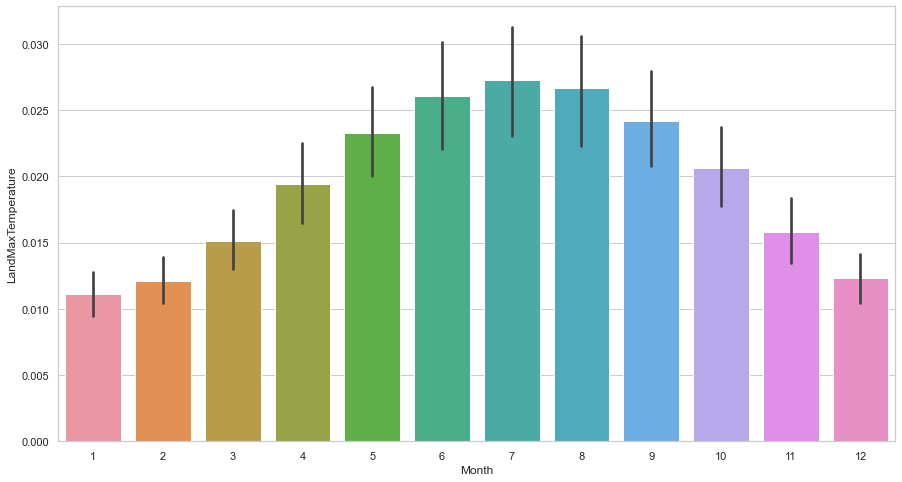

In [67]:
 sns.barplot(x="Month", y="LandMaxTemperature", data=df)

<AxesSubplot:xlabel='Month', ylabel='LandMinTemperature'>

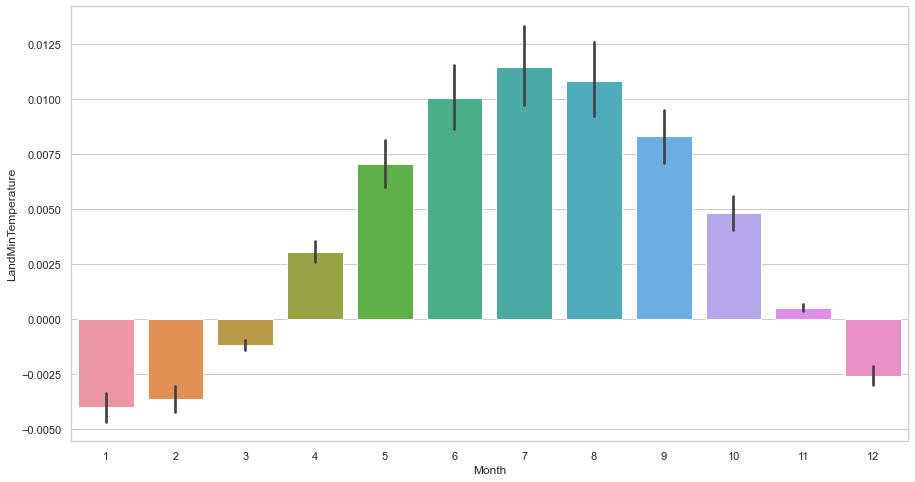

In [68]:
 sns.barplot(x="Month", y="LandMinTemperature", data=df)

In [69]:
x_array=np.array(df["LandAndOceanAverageTemperature"])

In [70]:
df_year=df.groupby('Year').agg({'LandAverageTemperature':'mean','LandAverageTemperatureUncertainty':'mean'}).reset_index()

In [71]:
df_year

,Year,LandAverageTemperature,LandAverageTemperatureUncertainty
0,1743,0.000000,0.000000
1,1744,0.000000,0.000000
2,1745,0.000000,0.000000
3,1746,0.000000,0.000000
4,1747,0.000000,0.000000
...,...,...,...
268,2011,0.016267,0.000140
269,2012,0.016252,0.000143
270,2013,0.021883,0.000222
271,2014,9.570666,0.090167


In [72]:
df_year['Uncertainity_top']= df_year['LandAverageTemperature'] + df_year['LandAverageTemperatureUncertainty']
df_year['Uncertainity_bottom']= df_year['LandAverageTemperature'] - df_year['LandAverageTemperatureUncertainty']

In [73]:
df_year.tail()

,Year,LandAverageTemperature,LandAverageTemperatureUncertainty,Uncertainity_top,Uncertainity_bottom
268,2011,0.016267,0.000140,0.016407,0.016126
269,2012,0.016252,0.000143,0.016394,0.016109
270,2013,0.021883,0.000222,0.022105,0.021660
271,2014,9.570666,0.090167,9.660833,9.480499
272,2015,9.831000,0.092167,9.923167,9.738833


In [74]:
import plotly.express as px
fig = px.line(df_year,x='Year',y=['LandAverageTemperature','Uncertainity_top', 'Uncertainity_bottom'],title='Average land temperature in World')
fig.show()

In [75]:
def get_season(month):
    if month>=3 and month<=5:
        return 'spring'
    elif month>=6 and month<=8:
        return 'summer'
    elif month>=9 and month<=11:
        return 'autumn'
    else:
        return 'winter'

In [76]:
df['season']=df['Month'].apply(get_season)

In [77]:
df["season"].value_counts()

summer    366753
spring    366653
winter    366219
autumn    365881
Name: season, dtype: int64

In [78]:
years=df['Year'].unique()


In [79]:
spring_temp = []
summer_temp = []
autumn_temp = []
winter_temp = []
for year in years:
    current_df=df[df['Year'] == year]
    spring_temp.append(current_df[current_df['season'] == 'spring']['LandAverageTemperature'].mean())
    summer_temp.append(current_df[current_df['season'] == 'summer']['LandAverageTemperature'].mean())
    autumn_temp.append(current_df[current_df['season'] == 'autumn']['LandAverageTemperature'].mean())
    winter_temp.append(current_df[current_df['season'] == 'winter']['LandAverageTemperature'].mean())

In [80]:
season=pd.DataFrame()

In [81]:
season['year'] = years
season['spring_temp'] = spring_temp
season['summer_temp'] = summer_temp
season['autumn_temp'] = autumn_temp
season['winter_temp'] = winter_temp

In [82]:
season.tail()

,year,spring_temp,summer_temp,autumn_temp,winter_temp
268,2011,0.015709,0.025564,0.017138,0.006655
269,2012,0.016119,0.025235,0.017450,0.006203
270,2013,0.015670,0.025250,0.052528,0.010787
271,2014,9.516334,14.694333,10.044666,4.027334
272,2015,9.455000,14.770333,10.411000,4.687666


In [83]:
fig=px.line(season,y=['spring_temp','summer_temp','autumn_temp','winter_temp'],title='Avg.temperature in each season')
fig.show()   #season wise it gets warmer

In [84]:
usa=df[df['Country']=='United States']

In [85]:
data_city=['New York','Los Angeles','San Francisco']

In [86]:
data2=usa[usa['City'].isin(data_city)]
data2.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,Country,City,Latitude,Longitude,State,LandAverageTemperature,LandAverageTemperatureUncertainty,...,LandMaxTemperatureUncertainty,LandMinTemperature,LandMinTemperatureUncertainty,LandAndOceanAverageTemperature,LandAndOceanAverageTemperatureUncertainty,Date,Month,Year,Day,season
709308,1849-01-01,8.819,2.558,United States,Los Angeles,34.56N,118.70W,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1849-01-01,1,1849,0,winter
709309,1849-02-01,9.577,1.970,United States,Los Angeles,34.56N,118.70W,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1849-02-01,2,1849,3,winter
709310,1849-03-01,11.814,2.173,United States,Los Angeles,34.56N,118.70W,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1849-03-01,3,1849,3,spring
709311,1849-04-01,13.704,2.902,United States,Los Angeles,34.56N,118.70W,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1849-04-01,4,1849,6,spring
709312,1849-05-01,14.834,2.017,United States,Los Angeles,34.56N,118.70W,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1849-05-01,5,1849,1,spring


In [87]:
data2=data2[['dt','AverageTemperature']]
data2.head()

,dt,AverageTemperature
709308,1849-01-01,8.819
709309,1849-02-01,9.577
709310,1849-03-01,11.814
709311,1849-04-01,13.704
709312,1849-05-01,14.834


In [88]:
data2.columns=['Date','Temp']
data2.head()

,Date,Temp
709308,1849-01-01,8.819
709309,1849-02-01,9.577
709310,1849-03-01,11.814
709311,1849-04-01,13.704
709312,1849-05-01,14.834


In [89]:
data2['Date']=pd.to_datetime(data2['Date'])

In [90]:
data2.isnull().sum()

Date    0
Temp    0
dtype: int64

In [91]:
data2.shape

(5216, 2)

In [92]:
data2.set_index('Date',inplace=True)

##Checking Stationarity

In [93]:
pip install statsmodels

In [94]:
from statsmodels.tsa.stattools import adfuller
test_result=adfuller(data2['Temp'])

In [95]:
#checking stationary or not
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    
    
    #Determing rolling statistics
    rolmean =pd.Series(timeseries).rolling(window=12).mean()
    rolstd = pd.Series(timeseries).rolling(window=12).std()

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='pink', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value

    print (dfoutput)

In [96]:
def adfuller_test(temp):
    result=adfuller(temp)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")

In [97]:
adfuller_test(data2['Temp'])

ADF Test Statistic : -3.1846722720490668
p-value : 0.020889228789822523
#Lags Used : 33
Number of Observations Used : 5182
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


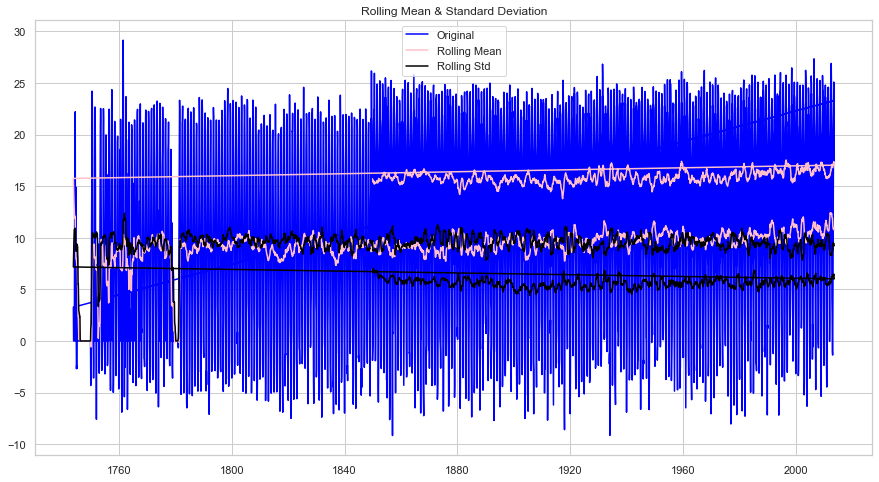

Results of Dickey-Fuller Test:
Test Statistic                   -3.184672
p-value                           0.020889
#Lags Used                       33.000000
Number of Observations Used    5182.000000
Critical Value (1%)              -3.431613
Critical Value (5%)              -2.862098
Critical Value (10%)             -2.567067
dtype: float64


In [98]:
test_stationarity(data2["Temp"])

In [99]:
df=data2.copy()

In [100]:
df.head()

,Temp
Date,
1849-01-01,8.819
1849-02-01,9.577
1849-03-01,11.814
1849-04-01,13.704
1849-05-01,14.834


##Transforming to non-stationary to stationary

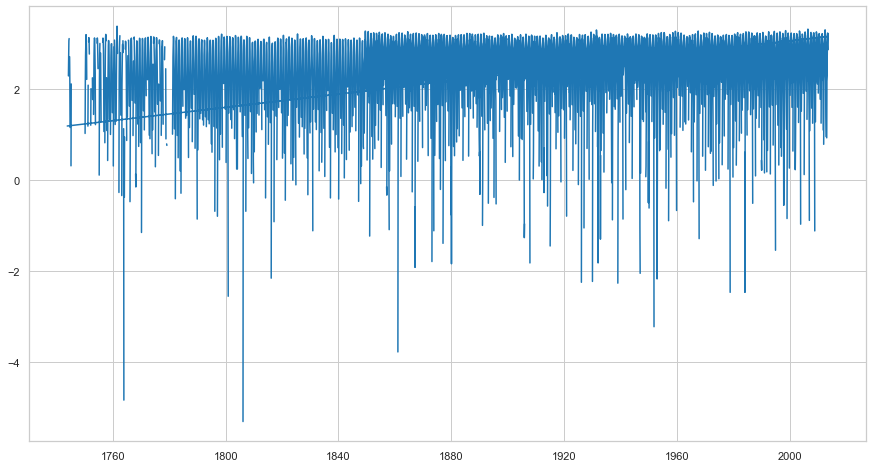

In [101]:
ts_log = np.log(df)
plt.plot(ts_log) #transforming into log

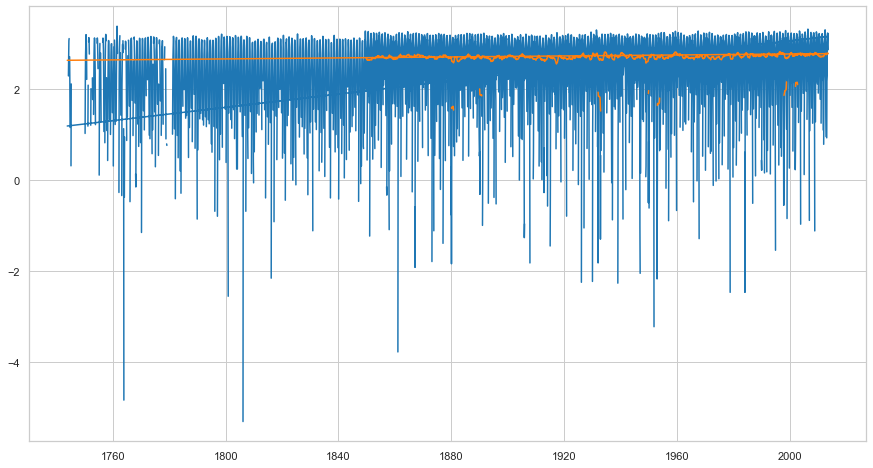

In [102]:
moving_avg = ts_log.rolling(12).mean()
plt.plot(ts_log)
plt.plot(moving_avg) #MA

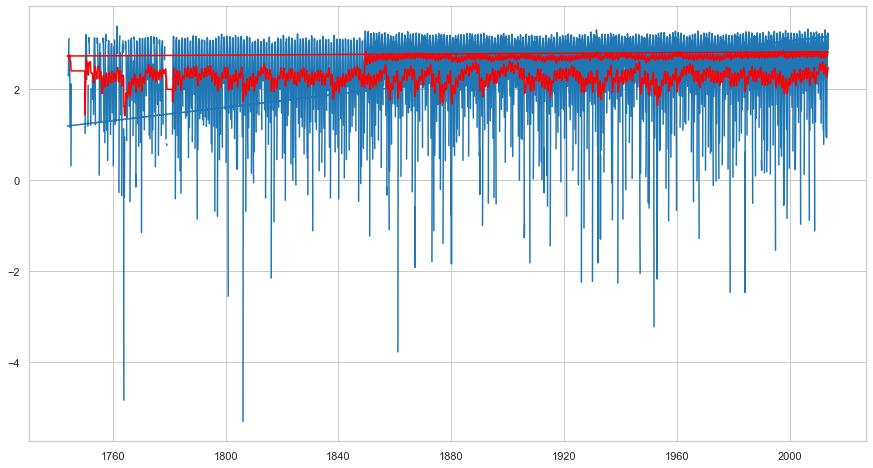

In [103]:
expwighted_avg =ts_log.ewm(halflife=12,min_periods=0,adjust=True,ignore_na=False).mean()
plt.plot(ts_log)
plt.plot(expwighted_avg, color='red') #esxponential weight moving average

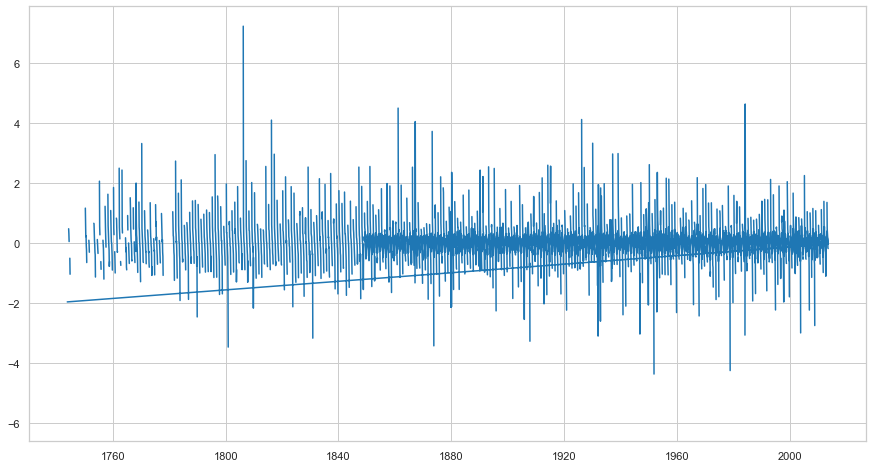

In [104]:
ts_log_diff = ts_log - ts_log.shift()
plt.plot(ts_log_diff)  #looks perfectly stationary!

In [105]:
df['First_temp_diff']=df['Temp']-df['Temp'].shift(12)

In [106]:
df.head()

,Temp,First_temp_diff
Date,,
1849-01-01,8.819,NaN
1849-02-01,9.577,NaN
1849-03-01,11.814,NaN
1849-04-01,13.704,NaN
1849-05-01,14.834,NaN


<AxesSubplot:xlabel='Date'>

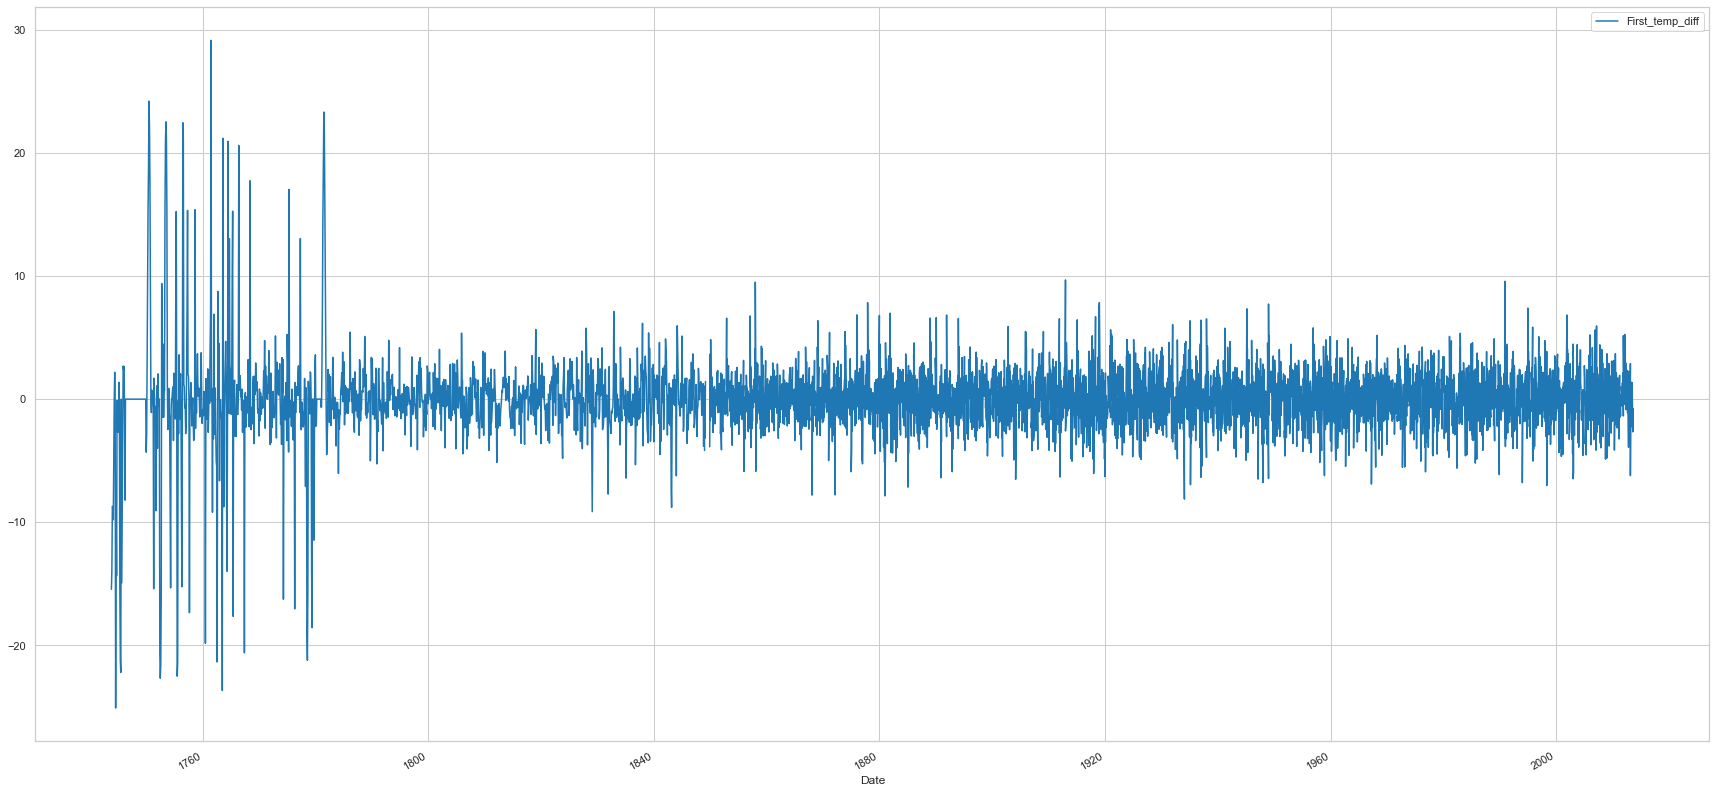

In [107]:
df[['First_temp_diff']].plot(figsize=(30,15))

In [108]:
data2['month']=data2.index.month

In [109]:
data2['year']=data2.index.year

In [110]:
data2.head()

,Temp,month,year
Date,,,
1849-01-01,8.819,1,1849
1849-02-01,9.577,2,1849
1849-03-01,11.814,3,1849
1849-04-01,13.704,4,1849
1849-05-01,14.834,5,1849


In [111]:
pivot = data2.pivot_table(values='Temp',index='month',columns='year')

In [112]:
pivot

year,1743,1744,1745,1746,1747,1748,1749,1750,1751,1752,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
month,,,,,,,,,,,,,,,,,,,,,
1,NaN,0.000000,-2.363,0.0,0.0,0.0,0.0,-4.310000,-3.591000,-7.588,...,1.631500,3.129500,5.727000,4.401500,3.811500,3.261000,3.865500,2.984500,5.770000,3.922500
2,NaN,0.000000,-2.671,0.0,0.0,0.0,0.0,-2.719000,-2.051000,0.000,...,3.899500,5.000000,5.611000,3.092000,4.907000,4.631500,4.448500,3.757500,6.397000,4.219500
3,NaN,0.000000,1.363,0.0,0.0,0.0,0.0,2.773000,3.256000,3.322,...,10.369500,6.846500,6.319000,8.878000,8.467999,7.787500,9.576000,7.729500,10.155001,8.490500
4,NaN,9.788000,8.209,0.0,0.0,0.0,0.0,8.848000,7.992000,7.402,...,12.918500,12.178500,11.530500,11.454500,12.935500,12.223000,12.179501,12.386000,12.537500,12.822000
5,NaN,15.708000,0.000,0.0,0.0,0.0,0.0,15.411000,0.000000,0.000,...,18.302500,15.657500,17.111000,17.392000,15.387501,17.740999,16.507000,16.323000,18.228001,17.285999
6,NaN,21.209999,0.000,0.0,0.0,0.0,0.0,19.017000,20.724001,0.000,...,20.468500,20.792999,22.020500,21.357000,22.475500,19.182499,21.333500,20.185501,20.615501,21.663000
7,NaN,22.207001,0.000,0.0,0.0,0.0,0.0,24.202999,22.667999,0.000,...,23.230000,24.690001,25.750500,23.779999,24.362499,23.410000,24.212500,24.275499,24.165001,24.906000
8,NaN,0.000000,0.000,0.0,0.0,0.0,0.0,22.135000,21.547001,0.000,...,22.860500,24.325500,23.084999,23.734501,23.059500,23.576500,23.107500,23.348499,24.811501,22.616501
9,NaN,14.922000,0.000,0.0,0.0,0.0,0.0,17.445000,15.812000,0.000,...,20.743500,20.201500,19.573500,19.948000,21.023001,20.653999,20.796001,21.014500,21.461000,20.354500


Text(0, 0.5, 'Temperature')

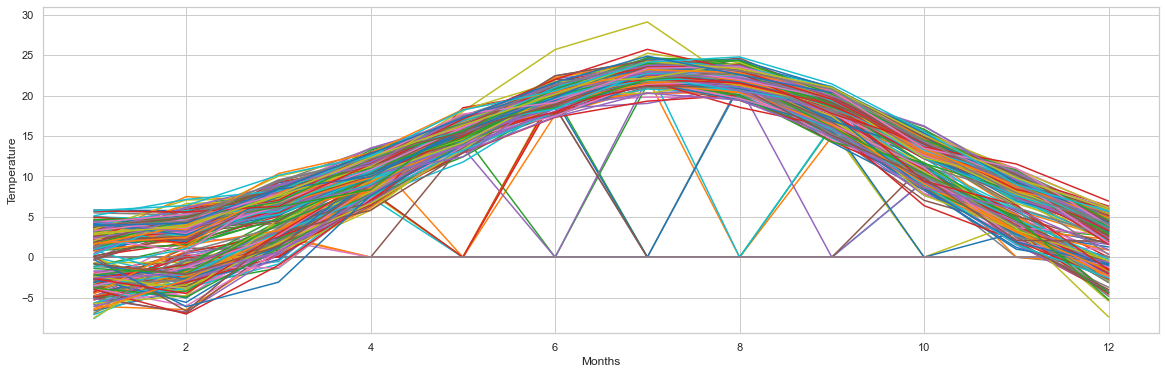

In [113]:
pivot.plot(figsize=(20,6))
plt.legend().remove()
plt.xlabel('Months')
plt.ylabel('Temperature')


<AxesSubplot:xlabel='month'>

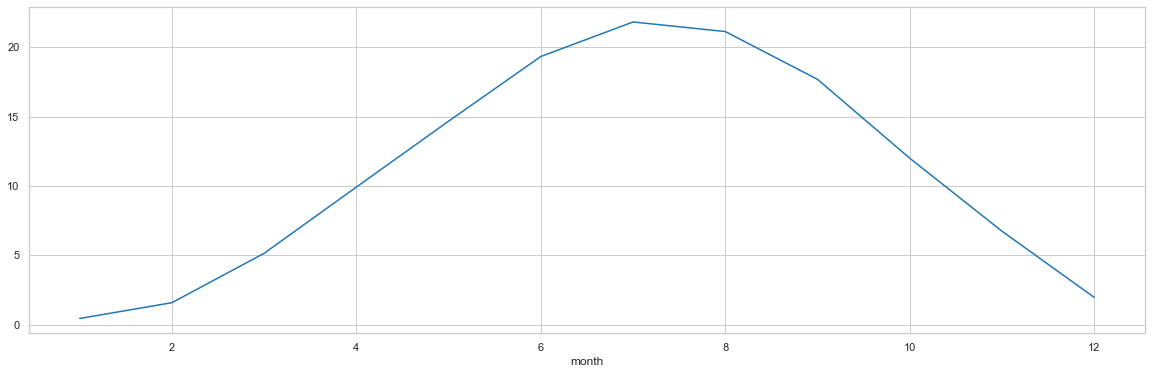

In [114]:
monthly_seasonality=pivot.mean(axis=1)
monthly_seasonality.plot(figsize=(20,6))

In [115]:
df.head()

,Temp,First_temp_diff
Date,,
1849-01-01,8.819,NaN
1849-02-01,9.577,NaN
1849-03-01,11.814,NaN
1849-04-01,13.704,NaN
1849-05-01,14.834,NaN


In [116]:
df=df[['First_temp_diff']]
df.dropna(inplace=True)

In [117]:
df.head()

,First_temp_diff
Date,
1850-01-01,-1.732000
1850-02-01,-1.002000
1850-03-01,-1.449000
1850-04-01,0.030999
1850-05-01,1.799000


In [118]:
df['First_temp_diff'].rolling(window=5).mean()

Date
1850-01-01         NaN
1850-02-01         NaN
1850-03-01         NaN
1850-04-01         NaN
1850-05-01   -0.470600
                ...   
2013-05-01   -2.705800
2013-06-01   -2.375000
2013-07-01   -1.616400
2013-08-01   -0.719201
2013-09-01   -0.752800
Name: First_temp_diff, Length: 5204, dtype: float64

In [119]:
value=pd.DataFrame(df['First_temp_diff'])

In [120]:
temp_df=pd.concat([value,df['First_temp_diff'].rolling(window=5).mean()],axis=1)

In [121]:
temp_df.columns=['actual_temp','forecast_temp']
temp_df.tail()

,actual_temp,forecast_temp
Date,,
2013-05-01,-2.235000,-2.705800
2013-06-01,0.726999,-2.375000
2013-07-01,0.243000,-1.616400
2013-08-01,-1.730001,-0.719201
2013-09-01,-0.768999,-0.752800


In [122]:

print("MSE after differencing:",np.sqrt(mean_squared_error(temp_df['forecast_temp'][4:],temp_df['actual_temp'][4:])))
print("MAPE after differencing:",np.sqrt(mean_absolute_percentage_error(temp_df['forecast_temp'][4:],temp_df['actual_temp'][4:])))

MSE after differencing: 2.4656442135717986
MAPE after differencing: 2.951130800411492


##ACF and PACF

In [123]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

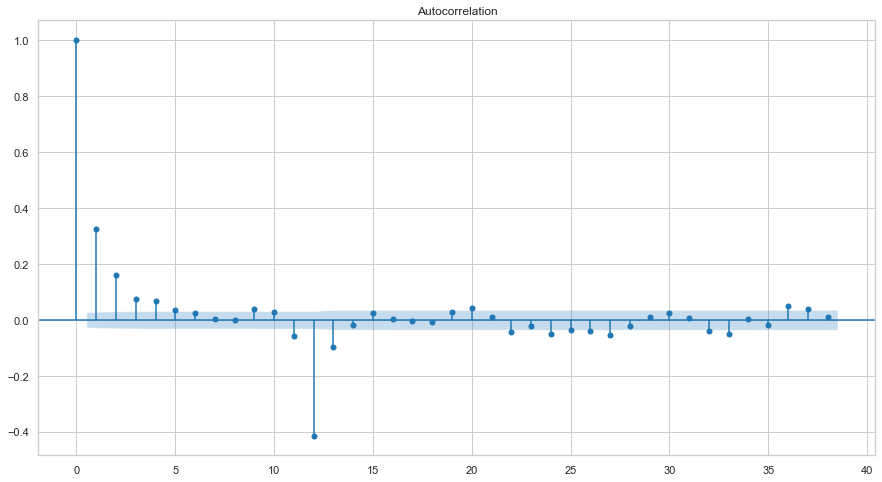

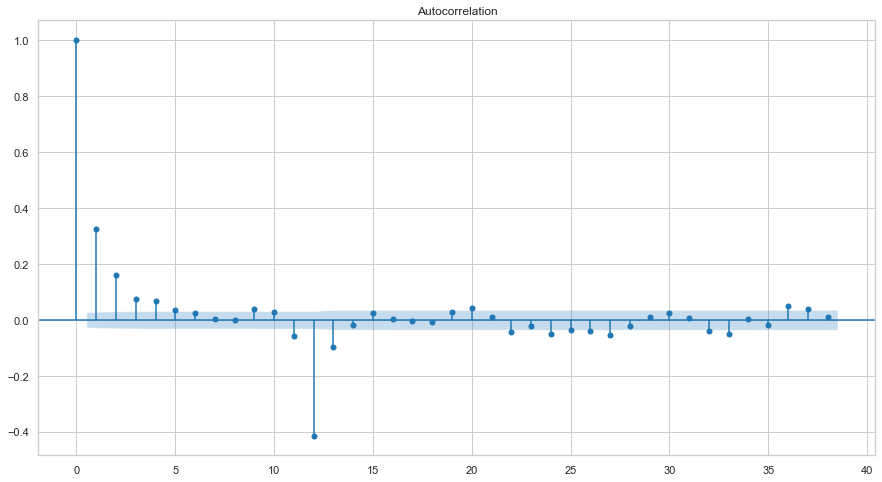

In [124]:
plot_acf(df['First_temp_diff'].dropna())

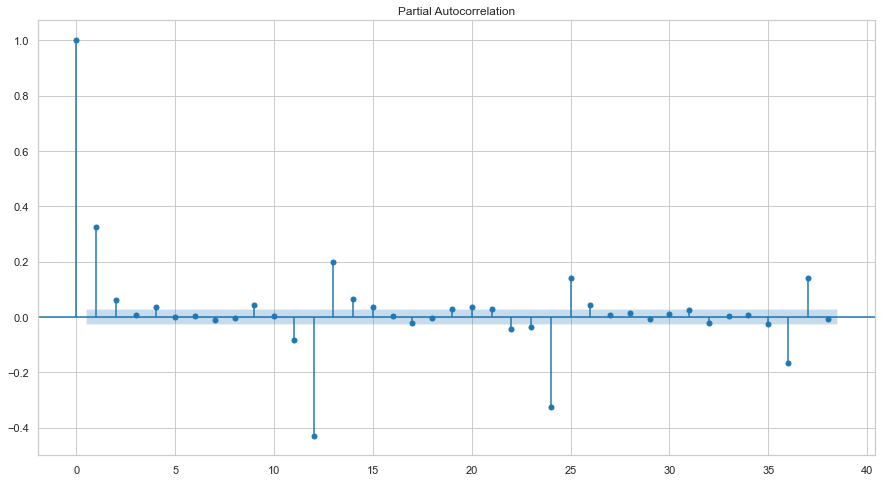

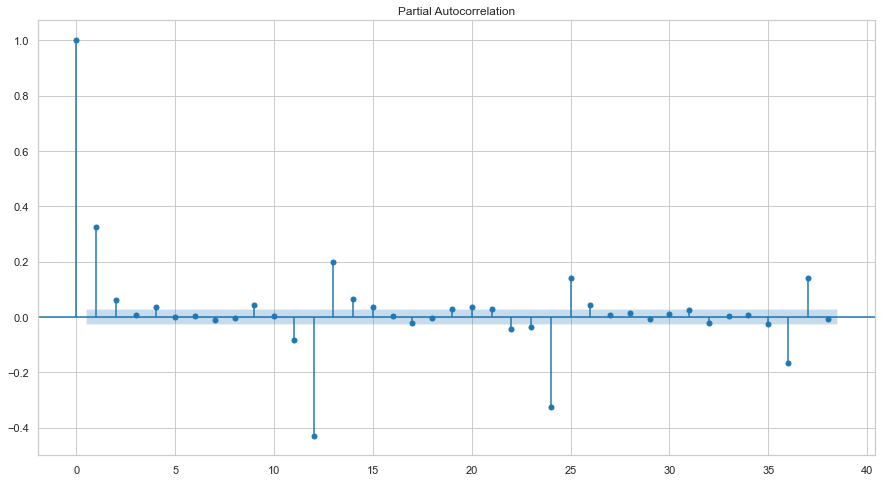

In [125]:
plot_pacf(df['First_temp_diff'].dropna())

In [126]:
df.isna().sum()

First_temp_diff    0
dtype: int64

In [127]:
#training data
test_size=int(len(df)*0.2)   #20% for test data
training_data = df[:-test_size]
testing_data= df[-test_size:]

print(f'Length of train set: {len(training_data)}')
print(f'Length of test set: {len(testing_data)}')


Length of train set: 4164
Length of test set: 1040


In [129]:
#Auto arima is used to know the best fit order 
import pmdarima as pm
model = pm.auto_arima(training_data, start_p=1, start_q=1,
                      testing_data='adf',       # use adftest to find optimal 'd'
                      max_p=3, max_q=3, # maximum p and q
                      m=1,              # frequency of series
                      d=None,           # let model determine 'd'
                      seasonal=False,   # No Seasonality
                      start_P=0, 
                      D=0, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)

print(model.summary())

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=20620.277, Time=2.22 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=21164.365, Time=0.16 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=20632.008, Time=0.28 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=20726.731, Time=0.48 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=20621.773, Time=1.69 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=20622.092, Time=1.37 sec
 ARIMA(0,0,2)(0,0,0)[0]             : AIC=20639.496, Time=0.87 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=20620.739, Time=0.54 sec
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=20623.453, Time=3.49 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=20622.192, Time=1.68 sec

Best model:  ARIMA(1,0,1)(0,0,0)[0]          
Total fit time: 12.949 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 4164
Model:               SARIMAX(1, 0, 1)   Log Likelih

##Building the ARIMA model

In [130]:
from statsmodels.tsa.arima.model import ARIMA


In [131]:
arima = ARIMA(training_data,order=(1,0,1))

C:\Users\DELL\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\DELL\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:585: ValueWarning:

A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.

C:\Users\DELL\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\DELL\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:585: ValueWarning:

A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.

C:\Users\DELL\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning:

A date index has been provided, but it has no associated frequ

In [132]:

model= arima.fit()

In [133]:
print(model.summary())

                               SARIMAX Results                                
Dep. Variable:        First_temp_diff   No. Observations:                 4164
Model:                 ARIMA(1, 0, 1)   Log Likelihood              -10307.096
Date:                Mon, 06 Dec 2021   AIC                          20622.192
Time:                        00:04:47   BIC                          20647.529
Sample:                             0   HQIC                         20631.155
                               - 4164                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0214      0.073     -0.292      0.770      -0.165       0.122
ar.L1          0.4927      0.017     28.816      0.000       0.459       0.526
ma.L1         -0.1664      0.020     -8.322      0.0

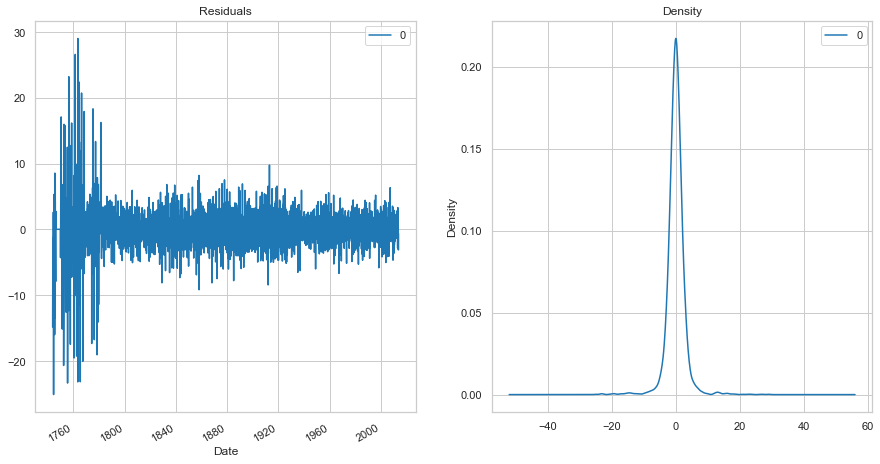

In [134]:
# Plot residual errors
residuals = pd.DataFrame(model.resid)
fig, ax = plt.subplots(1,2)
residuals.plot(title="Residuals", ax=ax[0])
residuals.plot(kind='kde', title='Density', ax=ax[1])
plt.show()

###Forecasting the model

In [135]:
#forecasting
predictions=model.forecast(steps=len(testing_data))
predictions


C:\Users\DELL\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:376: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.



4164   -0.474891
4165   -0.244843
4166   -0.131490
4167   -0.075637
4168   -0.048116
          ...   
5199   -0.021384
5200   -0.021384
5201   -0.021384
5202   -0.021384
5203   -0.021384
Name: predicted_mean, Length: 1040, dtype: float64

##Building the SARIMA model
- consider the seasonal components as we have observed  a seasonal compoenent which is part of the variations in a time series representing year fluctuations that are more or less stable year 
after year with respect to timing in our data

In [136]:

from statsmodels.tsa.statespace.sarimax import SARIMAX
model_s=SARIMAX(training_data,order=(1,1,1),seasonal_order=(0,2,1,12))
model_s=model_s.fit()
model_s.summary()

C:\Users\DELL\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\DELL\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:585: ValueWarning:

A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.

C:\Users\DELL\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\DELL\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:585: ValueWarning:

A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.

C:\Users\DELL\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning:

Non-invertible starting seasonal moving average Using zero

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                    First_temp_diff   No. Observations:                 4164
Model:             SARIMAX(1, 1, 1)x(0, 2, 1, 12)   Log Likelihood              -12516.363
Date:                            Mon, 06 Dec 2021   AIC                          25040.727
Time:                                    00:06:22   BIC                          25066.040
Sample:                                         0   HQIC                         25049.684
                                           - 4164                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2996      0.006     49.164      0.000       0.288       0.312
ma.L1         -0.9998      0.031    -32.457      0.000      -1.060      -0.939
ma.S.L12      -0.9981      0.075    -13.346      0.000      -1.145      -0.851
sigma2        24.3106      1.783     13.631      0.000      20.815      27.806
===================================================================================
Ljung-Box (L1) (Q):                   0.22   Jarque-Bera (JB):             58631.44
Prob(Q):                              0.64   Prob(JB):                         0.00
Heteroskedasticity (H):               2.18   Skew:                             1.00
Prob(H) (two-sided):                  0.00   Kurtosis:                        21.33
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

###Forecasting the model

In [137]:
#predictions using SARIMA
predictions_s=model_s.forecast(steps=len(testing_data))
predictions_s

C:\Users\DELL\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:376: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.



4164   -5.351065
4165   -5.038795
4166   -3.190912
4167    0.825787
4168   -4.950029
          ...   
5199   -0.866269
5200   -8.689770
5201   -0.633099
5202   -0.312136
5203   -3.928950
Name: predicted_mean, Length: 1040, dtype: float64

##performance metrics

In [139]:
print("SARIMA MSE:",mean_squared_error(testing_data,predictions_s))

SARIMA MSE: 21.56334991052574


In [140]:
print("SARIMA RMSE:",np.sqrt(mean_squared_error(testing_data,predictions_s)))

SARIMA RMSE: 4.6436354196389855


In [141]:
print("ARIMA MSE:",mean_squared_error(testing_data,predictions))


ARIMA MSE: 5.125907798618266


In [142]:
print("ARIMA RMSE:",np.sqrt(mean_squared_error(testing_data,predictions)))

ARIMA RMSE: 2.2640467748300313


In [ ]:
---THE END---